Total no. of rows in dataset = 36
Total no. of columns in dataset = 9
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     44.46
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           7.89e-10
Time:                        15:02:09   Log-Likelihood:                -190.65
No. Observations:                  25   AIC:                             395.3
Df Residuals:                      18   BIC:                             403.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

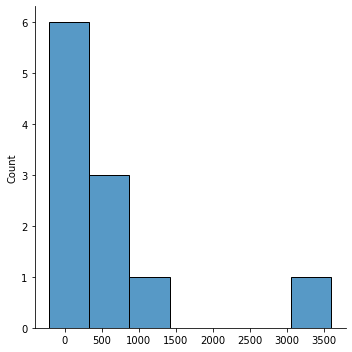

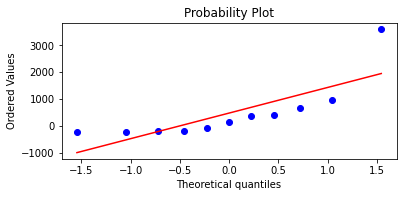

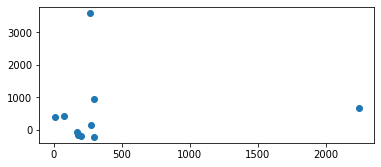

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('data.csv')
print("Total no. of rows in dataset = {}".format(df.shape[0]))
print("Total no. of columns in dataset = {}".format(df.shape[1]))
df.replace(',','', regex=True, inplace=True)

#Training the dataset:
target_col = "Total"
X= df.loc[:,df.columns[3:9]]
y= df.loc[:, target_col]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

#Ignore it. print(np.asarray(X))

#Linear Regression Using Statsmodels:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train.astype(float), X_with_constant.astype(float))
results = model.fit()
results.params

print(results.summary())

# The results show strong probabilty of multi collinearity

# Further Deep in Multi Collinearity
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test.astype(int))
y_test = np.array(y_test, dtype=int)
X_test = np.array(X_test, dtype=int)
y_pred = np.array(y_pred, dtype=int)
X_train = np.array(X_train, dtype=int)
residual = y_test - y_pred


# Finding Variance-in-factor
vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train[2]).T
print(vif)
sns.displot(residual)

#Probability Plot
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)


# Residual
np.mean(residual)

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)


print(residual)



In [48]:
df.head()

,Sr. No.,State,Total,Bridge Persons Killed,Culvert Persons Killed,Pot Holes Persons Killed,Steep Grade Persons Killed,Under Construction Persons Killed,Others Persons Killed
0,1,Andhra Pradesh,3114,268,121,32,15,96,414
1,2,Arunachal Pradesh,54,15,13,6,13,19,29
2,3,Assam,1690,229,119,93,63,123,296
3,4,Bihar,3436,178,206,0,102,16,602
4,5,Chhattisgarh,1421,158,143,28,24,84,818
